In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('Wine.csv')
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [3]:
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [4]:
data.duplicated().sum()

0

In [5]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


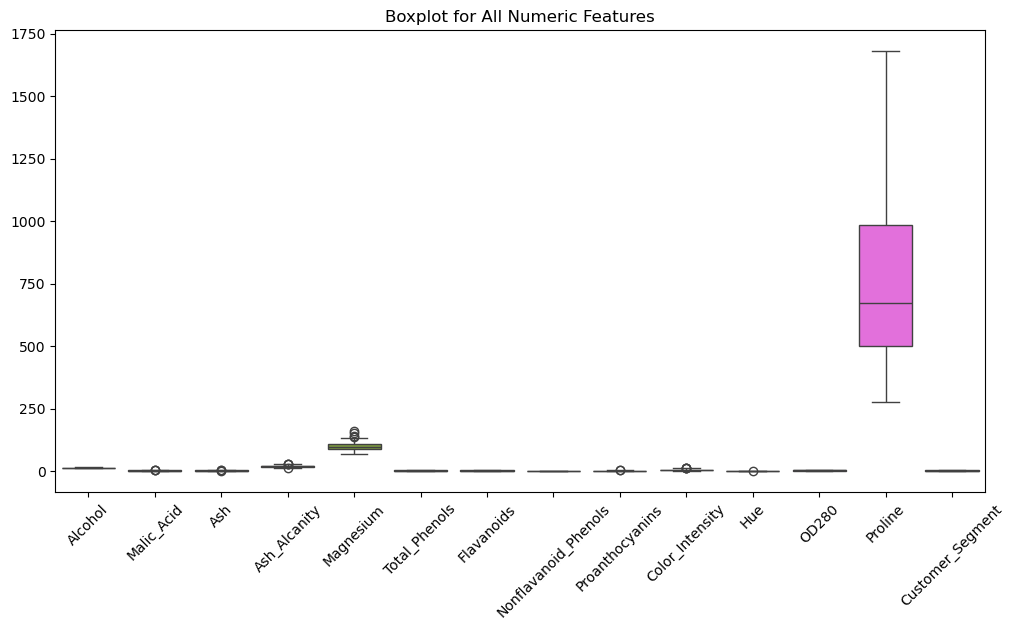

In [6]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data)
plt.title("Boxplot for All Numeric Features")
plt.xticks(rotation=45)
plt.show()

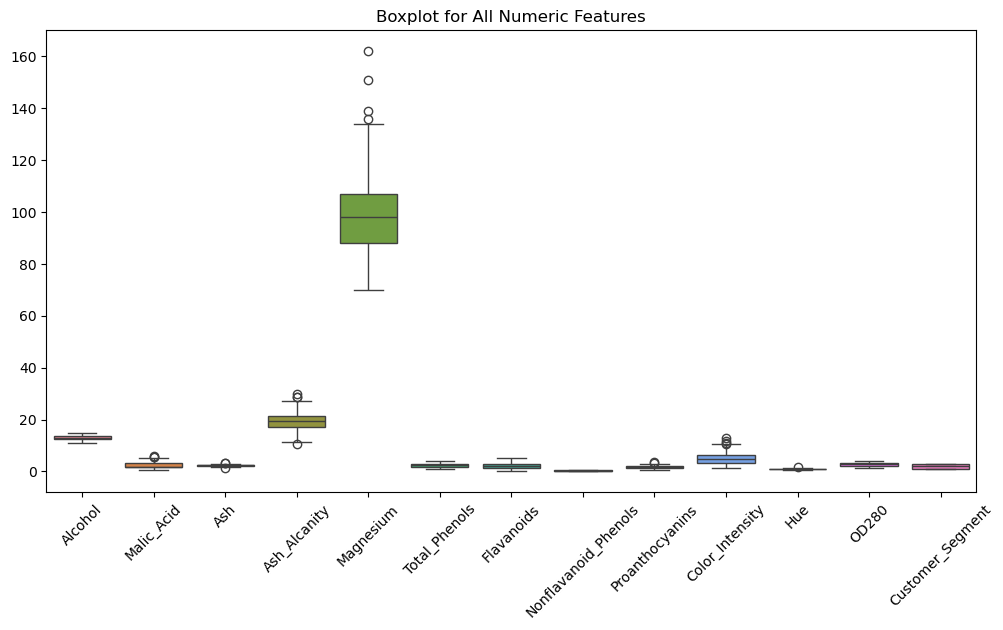

In [7]:
df= data.drop(columns='Proline')
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Boxplot for All Numeric Features")
plt.xticks(rotation=45)
plt.show()

In [8]:
def remove_outliers(data):
    numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
    for col in numeric_cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        
        # Keep only rows within the bounds
        data = data[(data[col] >= lower) & (data[col] <= upper)]
    return data

# Apply the function
df_clean = remove_outliers(data)

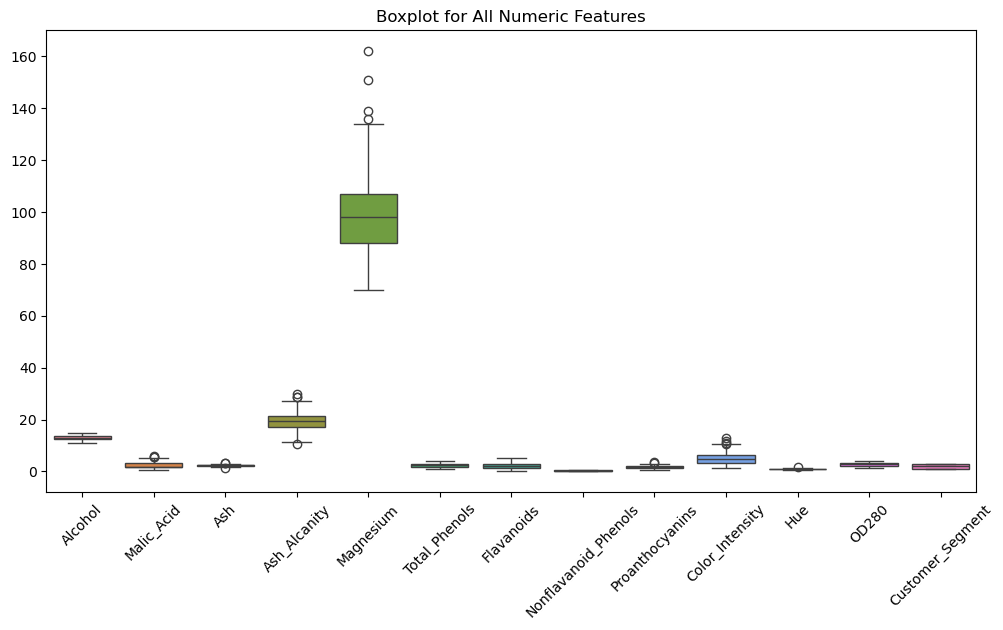

In [9]:
df= data.drop(columns='Proline')
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Boxplot for All Numeric Features")
plt.xticks(rotation=45)
plt.show()

In [10]:
# Data Split
X = data.drop("Customer_Segment", axis=1)

# Target
y = data["Customer_Segment"]
print("Features Shape:", X.shape)


Features Shape: (178, 13)


In [11]:
print("\nData Types of Features:")
print(X.dtypes)


Data Types of Features:
Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object


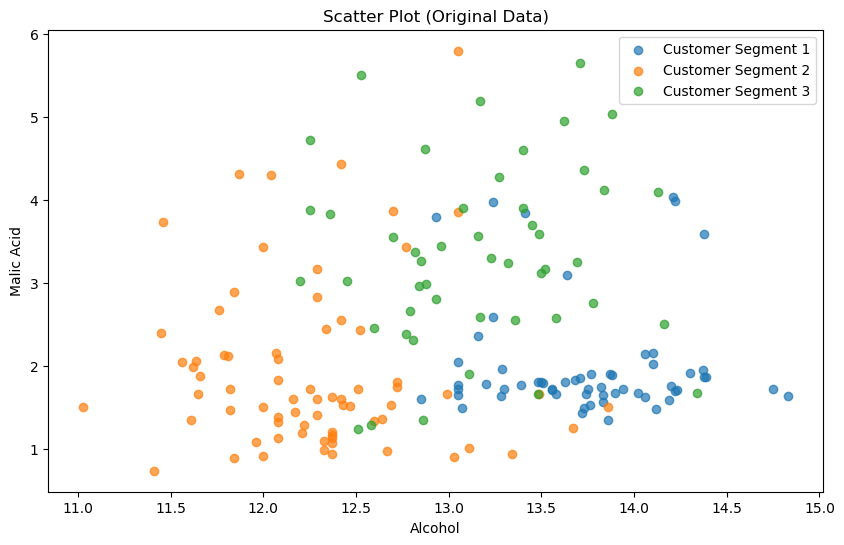

In [12]:
# Scatter plot before applying PCA
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 1]['Alcohol'], X[y == 1]['Malic_Acid'], label='Customer Segment 1', alpha=0.7)
plt.scatter(X[y == 2]['Alcohol'], X[y == 2]['Malic_Acid'], label='Customer Segment 2', alpha=0.7)
plt.scatter(X[y == 3]['Alcohol'], X[y == 3]['Malic_Acid'], label='Customer Segment 3', alpha=0.7)
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.legend()
plt.title('Scatter Plot (Original Data)')
plt.show()

In [13]:
# Standardize the Data: PCA works best when features are on the same scale

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Mean after scaling:", X_scaled.mean())


Mean after scaling: -1.2282501914608474e-16


In [14]:
# Applying PCA, Initialize PCA to 2 components for visualization

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.36198848 0.1920749 ]


In [15]:
# Create DataFrame with Principal Components

pca_df = pd.DataFrame(data=X_pca, columns=["PC1", "PC2"])
pca_df["Customer_Segment"] = y
print(pca_df.head())

        PC1       PC2  Customer_Segment
0  3.316751  1.443463                 1
1  2.209465 -0.333393                 1
2  2.516740  1.031151                 1
3  3.757066  2.756372                 1
4  1.008908  0.869831                 1


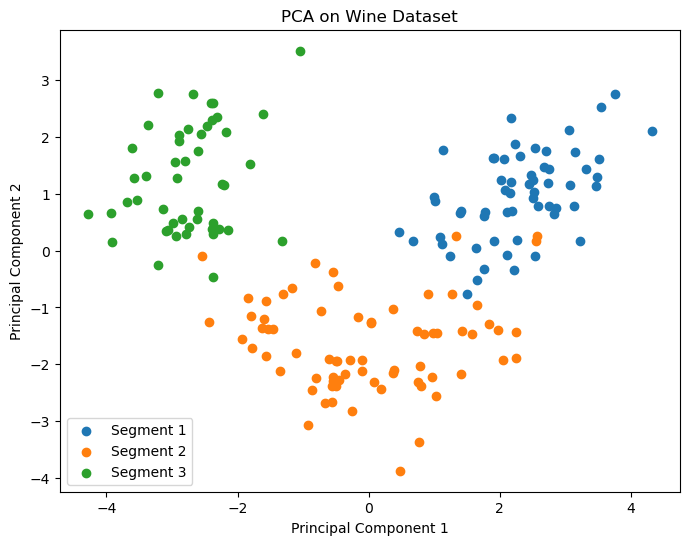

In [16]:
# Visualze PCA effects 
plt.figure(figsize=(8,6))

for segment in np.unique(y):
    plt.scatter(
        pca_df[pca_df["Customer_Segment"] == segment]["PC1"],
        pca_df[pca_df["Customer_Segment"] == segment]["PC2"],
        label=f"Segment {segment}"
    )
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA on Wine Dataset")
plt.legend()
plt.show()

In [17]:
print("Explained variance by components:", pca.explained_variance_ratio_)
print("Total variance captured:", np.sum(pca.explained_variance_ratio_))

Explained variance by components: [0.36198848 0.1920749 ]
Total variance captured: 0.5540633835693527


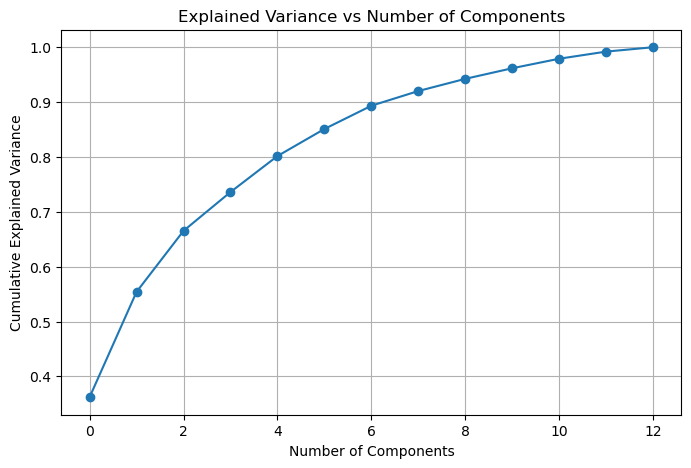

In [18]:
# Check Cumulative Variance

pca_full = PCA().fit(X_scaled)

plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker="o")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs Number of Components")
plt.grid()
plt.show()


In [19]:
total_variance = np.cumsum(pca_full.explained_variance_ratio_)
n_components_85 = np.argmax(total_variance >= 0.85) + 1

print(f"Number of components to capture 85% variance: {n_components_85}")

Number of components to capture 85% variance: 6


In [20]:
pca = PCA(n_components=n_components_85)
X_pca = pca.fit_transform(X_scaled)

# Print explained variance
print("Explained variance by components:", pca.explained_variance_ratio_)
print("Total variance captured:", np.sum(pca.explained_variance_ratio_))

Explained variance by components: [0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823]
Total variance captured: 0.8509811607477044
